In [1]:
import tensorflow as tf
from pathlib import Path
import pandas as pd
import numpy as np

2023-06-08 23:50:29.572247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
odiac = pd.read_csv(Path.cwd()/'../preprocessing/data2/clean/odiac_monthly.csv')
xco2 = pd.read_csv(Path.cwd()/'../preprocessing/data2/clean/oco2_lvl2_xco2_monthly.csv')

In [3]:
xco2.columns

Index(['Longitude', 'Latitude', 'Month', 'Year', 'xco2', 'xco2_anomaly',
       'geometry'],
      dtype='object')

In [4]:
odiac.columns

Index(['Latitude', 'Longitude', 'Emissions', 'Month', 'Year'], dtype='object')

In [5]:
data = pd.merge(odiac, xco2, how='left', on=['Longitude', 'Latitude', 'Month', 'Year'])
data = data.sort_values(by=['Year', 'Month', 'Longitude', 'Latitude']).reset_index().drop(columns=['index'])
data

,Latitude,Longitude,Emissions,Month,Year,xco2,xco2_anomaly,geometry
0,35.5,-24.5,0.000000,1,2015,398.437805,0.180817,POINT (-24.5 35.5)
1,36.5,-24.5,0.000000,1,2015,398.850555,0.593567,POINT (-24.5 36.5)
2,37.5,-24.5,0.000000,1,2015,396.721029,-47.294352,POINT (-24.5 37.5)
3,38.5,-24.5,0.000000,1,2015,393.097565,-5.386536,POINT (-24.5 38.5)
4,39.5,-24.5,0.000000,1,2015,396.571869,-1.912231,POINT (-24.5 39.5)
...,...,...,...,...,...,...,...,...
199795,67.5,64.5,0.301591,12,2019,401.264201,-98.678945,POINT (64.5 67.5)
199796,68.5,64.5,0.000000,12,2019,397.068766,-102.874379,POINT (64.5 68.5)
199797,69.5,64.5,0.000337,12,2019,394.516693,-105.426453,POINT (64.5 69.5)
199798,70.5,64.5,0.000000,12,2019,399.343913,-100.599233,POINT (64.5 70.5)


In [6]:
X = data[['Latitude', 'Longitude', 'xco2', 'xco2_anomaly', 'Month', 'Year']]
y = data['Emissions']

In [7]:
from sklearn.preprocessing import MinMaxScaler

X_transfromed = MinMaxScaler().fit_transform(X)

In [8]:
X_train, X_test = X_transfromed[X['Year'] < 2019], X_transfromed[X['Year'] == 2019]
y_train, y_test = y[X['Year'] < 2019], y[X['Year'] == 2019]

In [9]:
X_train

array([[0.        , 0.        , 0.01272143, 0.08970932, 0.        ,
        0.        ],
       [0.02777778, 0.        , 0.01279738, 0.08977954, 0.        ,
        0.        ],
       [0.05555556, 0.        , 0.01240555, 0.08163267, 0.        ,
        0.        ],
       ...,
       [0.94444444, 1.        , 0.01022797, 0.0776975 , 1.        ,
        0.75      ],
       [0.97222222, 1.        , 0.01288815, 0.08015709, 1.        ,
        0.75      ],
       [1.        , 1.        , 0.01295473, 0.08021864, 1.        ,
        0.75      ]])

In [10]:
y_test

159840    0.000000
159841    0.000000
159842    0.000000
159843    0.000000
159844    0.000000
            ...   
199795    0.301591
199796    0.000000
199797    0.000337
199798    0.000000
199799    0.000000
Name: Emissions, Length: 39960, dtype: float64

In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, input_dim=6),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])

model1.compile(loss=tf.keras.losses.mse, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model1.fit(X_train, y_train, epochs=20)

Epoch 1/20
4995/4995 [==============================] - 9s 2ms/step - loss: 0.2873 - mae: 0.1716
Epoch 2/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 3/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 4/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 5/20
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 6/20
4995/4995 [==============================] - 8s 2ms/step - loss: 0.2873 - mae: 0.1716
Epoch 7/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 8/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 9/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 10/20
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 11/20
4995/4995 [======

In [12]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_dim=6, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])

model2.compile(loss=tf.keras.losses.mse, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2047 - mae: 0.1654
Epoch 2/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1871 - mae: 0.1587
Epoch 3/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1843 - mae: 0.1573
Epoch 4/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.1793 - mae: 0.1550
Epoch 5/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1763 - mae: 0.1535
Epoch 6/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1713 - mae: 0.1515
Epoch 7/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1712 - mae: 0.1501
Epoch 8/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.1694 - mae: 0.1480
Epoch 9/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1664 - mae: 0.1460
Epoch 10/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.1664 - mae: 0.1446
Epoch 11/100
4995/4

In [33]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_dim=6, activation=tf.keras.layers.LeakyReLU(alpha=0.02)),
  tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
  tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
  tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
  tf.keras.layers.Dense(1, activation='relu')
])

model3.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
4995/4995 [==============================] - 10s 2ms/step - loss: 0.2873 - mae: 0.1716
Epoch 2/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 3/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 4/100
4995/4995 [==============================] - 8s 2ms/step - loss: 0.2873 - mae: 0.1716
Epoch 5/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 6/100
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 7/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 8/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 9/100
4995/4995 [==============================] - 6s 1ms/step - loss: 0.2873 - mae: 0.1716
Epoch 10/100
4995/4995 [==============================] - 10s 2ms/step - loss: 0.2873 - mae: 0.1716
Epoch 11/100
4995

In [15]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(256, input_dim=6, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])

model4.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model4.fit(X_train, y_train, epochs=100)

Epoch 1/100
4995/4995 [==============================] - 18s 3ms/step - loss: 0.2095 - mae: 0.1710
Epoch 2/100
4995/4995 [==============================] - 13s 3ms/step - loss: 0.1939 - mae: 0.1620
Epoch 3/100
4995/4995 [==============================] - 13s 3ms/step - loss: 0.1898 - mae: 0.1602
Epoch 4/100
4995/4995 [==============================] - 13s 3ms/step - loss: 0.1888 - mae: 0.1596
Epoch 5/100
4995/4995 [==============================] - 8s 2ms/step - loss: 0.1867 - mae: 0.1583
Epoch 6/100
4995/4995 [==============================] - 8s 2ms/step - loss: 0.1832 - mae: 0.1566
Epoch 7/100
4995/4995 [==============================] - 8s 2ms/step - loss: 0.1828 - mae: 0.1560
Epoch 8/100
4995/4995 [==============================] - 8s 2ms/step - loss: 0.1827 - mae: 0.1555
Epoch 9/100
4995/4995 [==============================] - 10s 2ms/step - loss: 0.1812 - mae: 0.1547
Epoch 10/100
4995/4995 [==============================] - 10s 2ms/step - loss: 0.1793 - mae: 0.1538
Epoch 11/100


In [16]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, input_dim=6, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])

model5.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model5.fit(X_train, y_train, epochs=200)

Epoch 1/200
4995/4995 [==============================] - 7s 1ms/step - loss: 0.2182 - mae: 0.1721
Epoch 2/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1969 - mae: 0.1570
Epoch 3/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1906 - mae: 0.1544
Epoch 4/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1878 - mae: 0.1535
Epoch 5/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1853 - mae: 0.1527
Epoch 6/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1836 - mae: 0.1521
Epoch 7/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1823 - mae: 0.1519
Epoch 8/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1813 - mae: 0.1515
Epoch 9/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1796 - mae: 0.1513
Epoch 10/200
4995/4995 [==============================] - 6s 1ms/step - loss: 0.1778 - mae: 0.1504
Epoch 11/200
4995/4

In [17]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify as mc
from shapely.geometry import Polygon, MultiPolygon, box

In [18]:
def model_procedure(model):
    y_pred = model.predict(X_test).squeeze()
    model.evaluate(X_test, y_test)
    preds = pd.merge(X[X['Year'] == 2019].reset_index(drop=True), pd.Series(y_pred, name='Emissions'), left_index=True, right_index=True)
    gdf = gpd.GeoDataFrame(preds, geometry=gpd.points_from_xy(x=preds.Longitude, y=preds.Latitude))

    return gdf

In [19]:
def plot_emission_map(gdf: gpd.GeoDataFrame, year: int, month: int, quantiles: int):
    fig_size = (12,5)
    fig, ax = plt.subplots(figsize = fig_size)
    
    world_filepath = gpd.datasets.get_path('naturalearth_lowres')
    world = gpd.read_file(world_filepath)
    europe = gpd.clip(world, box(-25, 35, 65, 72))

    europe.boundary.plot(
        figsize=fig_size,
        ax=ax,
        color='black'
    )
    gdf[(gdf.Year == year) & (gdf.Month == month)].plot(
        'Emissions', 
        ax=ax,
        scheme='quantiles', 
        k=quantiles, 
        figsize=fig_size,
        marker='s',
        markersize=40,
        legend=True, legend_kwds={'bbox_to_anchor': (1, 1)}
    )
    plt.axis('off')
    plt.show()

In [32]:
gdf1 = model_procedure(model1)
gdf2 = model_procedure(model2)
gdf3 = model_procedure(model3)
gdf4 = model_procedure(model4)
gdf5 = model_procedure(model5)

1249/1249 [==============================] - 2s 1ms/step - loss: 0.1277 - mae: 0.1289


/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 1.
  warnings.warn(


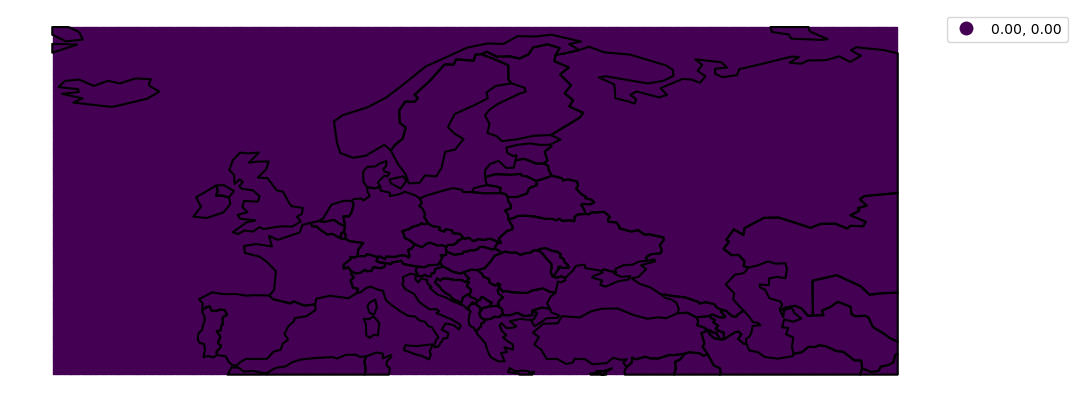

In [21]:
plot_emission_map(gdf1, 2019, 6, 20)

/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 1.
  warnings.warn(


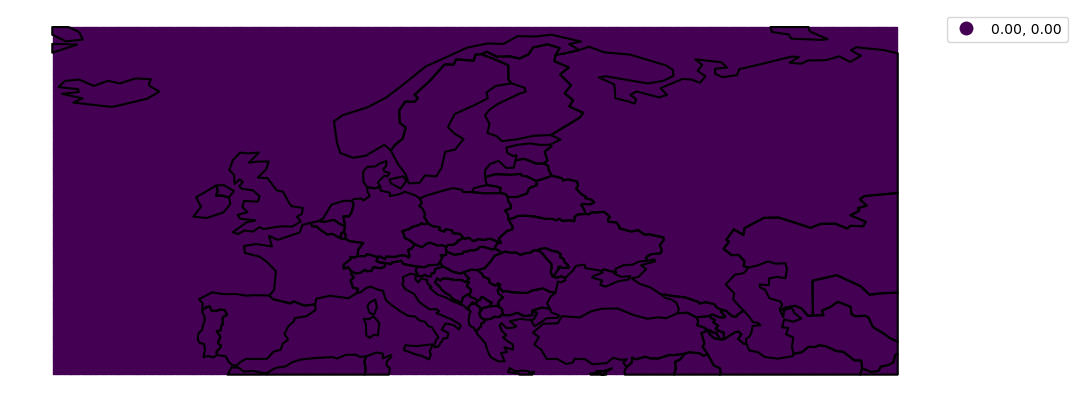

In [22]:
plot_emission_map(gdf1, 2019, 6, 20)

/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 10.
  warnings.warn(


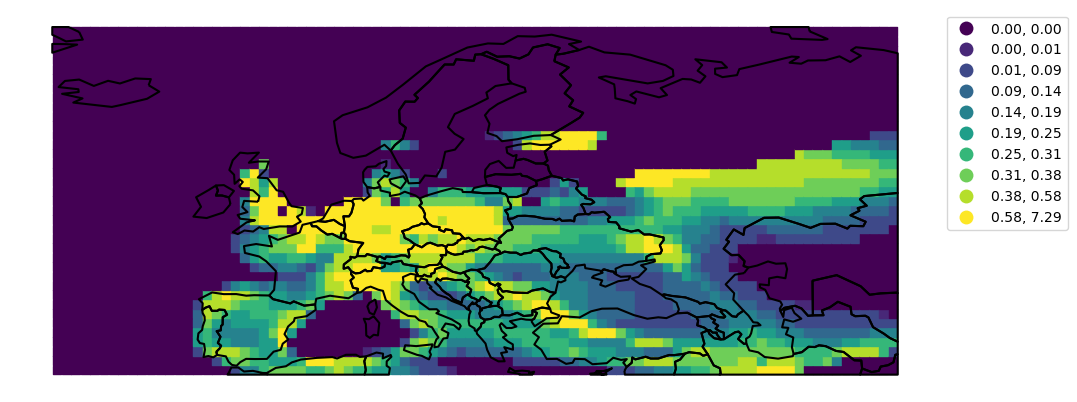

In [23]:
plot_emission_map(gdf2, 2019, 6, 20)

/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 10.
  warnings.warn(


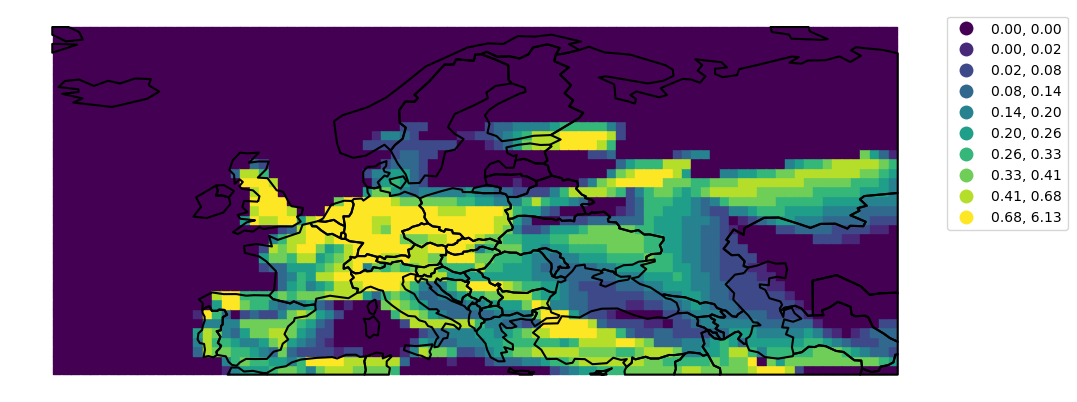

In [24]:
plot_emission_map(gdf3, 2019, 6, 20)

/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 12.
  warnings.warn(


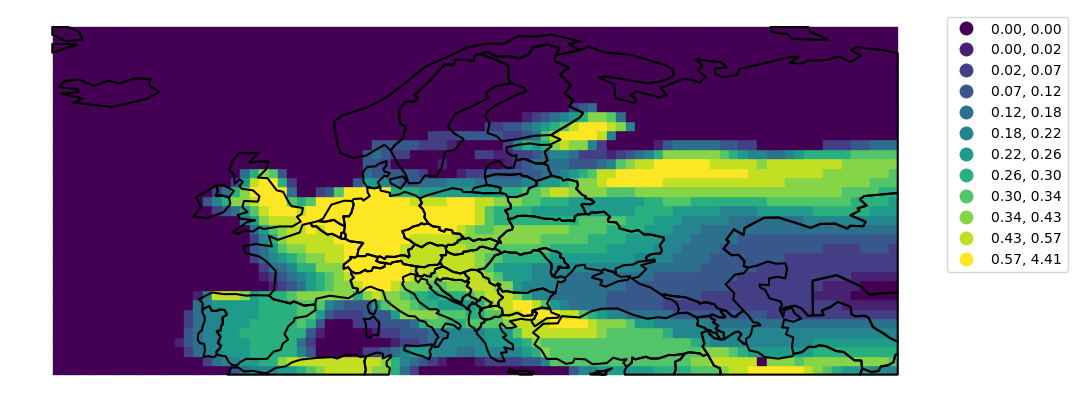

In [25]:
plot_emission_map(gdf4, 2019, 6, 20)

/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/timurkambachekov/opt/anaconda3/envs/geo_base/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 8.
  warnings.warn(


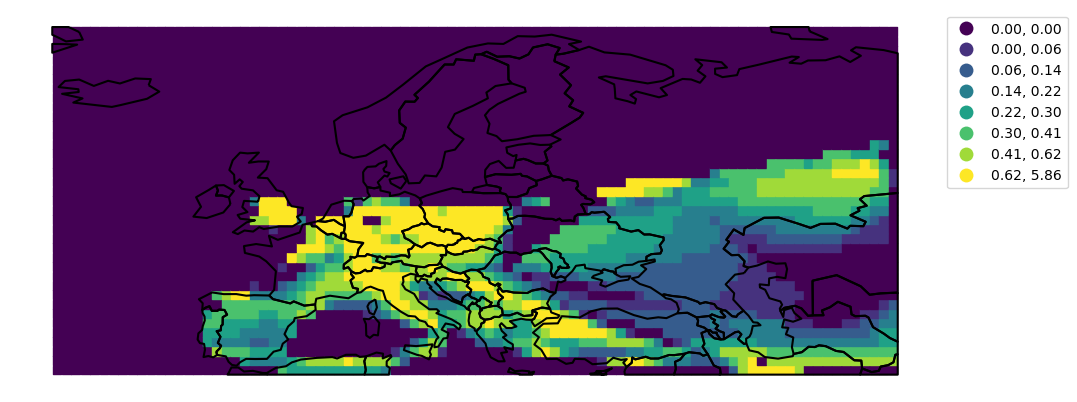

In [26]:
plot_emission_map(gdf5, 2019, 6, 20)

In [27]:
X_trans_pkl = pd.DataFrame(X_transfromed, columns=['Latitude', 'Longitude', 'xco2', 'xco2_anomaly', 'Month', 'Year'])

In [28]:
X.loc[(X['Year'] == 2015) & (X['Month'] == 1)]

,Latitude,Longitude,xco2,xco2_anomaly,Month,Year
0,35.5,-24.5,398.437805,0.180817,1,2015
1,36.5,-24.5,398.850555,0.593567,1,2015
2,37.5,-24.5,396.721029,-47.294352,1,2015
3,38.5,-24.5,393.097565,-5.386536,1,2015
4,39.5,-24.5,396.571869,-1.912231,1,2015
...,...,...,...,...,...,...
3325,67.5,64.5,391.255809,-52.759572,1,2015
3326,68.5,64.5,391.447876,-52.567505,1,2015
3327,69.5,64.5,383.840729,-60.174652,1,2015
3328,70.5,64.5,386.093730,-57.921651,1,2015


In [29]:
X_trans_pkl[(X['Year'] == 2019) & (X['Month'] == 5)]

,Latitude,Longitude,xco2,xco2_anomaly,Month,Year
173160,0.000000,0.0,0.015171,0.086273,0.363636,1.0
173161,0.027778,0.0,0.015111,0.086218,0.363636,1.0
173162,0.055556,0.0,0.014828,0.086858,0.363636,1.0
173163,0.083333,0.0,0.015314,0.086478,0.363636,1.0
173164,0.111111,0.0,0.014901,0.086096,0.363636,1.0
...,...,...,...,...,...,...
176485,0.888889,1.0,0.012158,0.086572,0.363636,1.0
176486,0.916667,1.0,0.015503,0.089980,0.363636,1.0
176487,0.944444,1.0,0.013185,0.087692,0.363636,1.0
176488,0.972222,1.0,0.012808,0.084704,0.363636,1.0


In [30]:
# import pickle

# with open('model.pkl','wb') as f:
#     pickle.dump(model,f)

# X_trans_pkl.to_pickle(Path.cwd()/'X_trans.pkl')
# X.to_pickle(Path.cwd()/'X.pkl')
# y.to_pickle(Path.cwd()/'y.pkl')